Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [95]:
NAME = ""
COLLABORATORS = ""

---

# Vaja 1: Upravljanje in prikazovanje slik
## Navodila
Vaja služi spoznavanju osnovnih ukazov za nalaganje, prikazovanje, shranjevanje slik in upravljanje z
digitalnimi slikami v programskem jeziku Python. V jeziku Python lahko sivinske slike predstavimo
z dvorazsežnimi polji ndarray v knjižnici NumPy, v katerih so slikovni elementi običajno shranjeni kot
nepredznačena 8-, 16- ali 32-bitna cela števila ali v zapisu s plavajočo vejico (Tabela 1).

### Tabela 1: Zapis sivinskih vrednosti s podatkovnimi tipi knjižnice numpy.

| Zapis sivin                 | Podatkovni tip (`dtype`)   | Zaloga vrednosti              |
| :-------------------------- | :------------------------- | :---------------------------- |
| binarna slika               | `'bool'`                   | { `False` , `True` }          |
| 8-bitni nepredznačeni       | `'uint8'`                  | \[0, 255\]                    |
| 16-bitni nepredznačeni      | `'uint16'`                 | \[0, 65535\]                  |
| 32-bitni predznačeni        | `'int32'`                  | \[-2\(^{31}\), 2\(^{31}\)-1\] |
| 32-bitni s plavajočo vejico | `'float32'` ali `'single'` | \[0.0, 1.0\]                  |
| 64-bitni s plavajočo vejico | `'float64'` ali `'double'` | \[0.0, 1.0\]                  |


Knjižnico **NumPy** naložimo z ukazom `import numpy as np`, do funkcij in spremenljivk v knjižnici pa dostopamo z `np.*` Nekatere uporabne funkcije za inicializacijo polja `ndarray` so `zeros()`, `ones()`, `zeros_like()`, `ones_like()`, `asarray()`, za pretvorbo tipa podatka `astype()` ali `array(mArray, dtype=...)`, za branje števila dimenzij `ndim()` in velikosti `shape()` polja in za preoblikovanje polja `reshape()` in `transpose()` (glej tudi vajo *0b - Uvod v Python*). Dvodimenzionalno polje `mArray` naslavljamo z npr. `mArray[0,3]` (element v ničti vrstici, tretjem stolpcu), `mArray[:,1]` (prvi stolpec), `mArray[-1,:]` (zadnja vrstica), itd. Indekse v sliki za logične izraze nad elementi slike lahko iščemo z ukazom `where()`. Koordinatni sistem slike in primeri naslavljanja elementov v sliki so prikazani na spodnji sliki. 


![Indeksiranje slik](RV_1_SLO_IndeksiranjeSlik.png)

Za branje in pisanje slik v surovem (nezgoščenem) zapisu sta v knjižnici **NumPy** uporabni funkciji `fromfile()` in `tofile()`. Za branje in pisanje slik v standardnih formatih (bmp, png, gif, eps, jpeg, itd.) pa lahko uporabimo knjižnico `PIL.Image` (če pri uvažanju knjižnice Python javi napako, potem jo najprej naložite v ukaznem oknu z ukazom `pip install pillow`). Sliko naložimo s funkcijo `open()`, ki ustvari spremenljivko tipa `Image`. Zapis slikovnih elementov v sliki preverimo z ukazom `getbands()`. S funkcijo `numpy.array` to spremenljivko pretvorimo v `numpy` podatkovno polje. Sliko v obliki `numpy` polja pretvorimo nazaj v tip `Image` s funkcijo `Image.fromarray()`. Slike tipa `Image` lahko pretvorimo v poljuben format s funkcijo `Image.convert()` in shranimo z ukazom `save()`.

Za prikazovanje slik lahko uporabite knjižnico `matplotlib.pyplot`. Ta modul uvozite z ukazoma:
```python
%matplotlib notebook
import matplotlib.pyplot as plt
```
Za izris slike je uporabna funkcija `imshow()`, za urejanje osi pa `suptitle()`, `xlabel()` in `ylabel()`, `axes()`.

## Naloge
1. Z uporabo knjižnice PIL naložite sliko v datoteki slika.jpg, jo pretvorite v sivinsko sliko in shranite v formatu png.

('R', 'G', 'B')
uint8
(650, 975, 3)


<IPython.core.display.Javascript object>


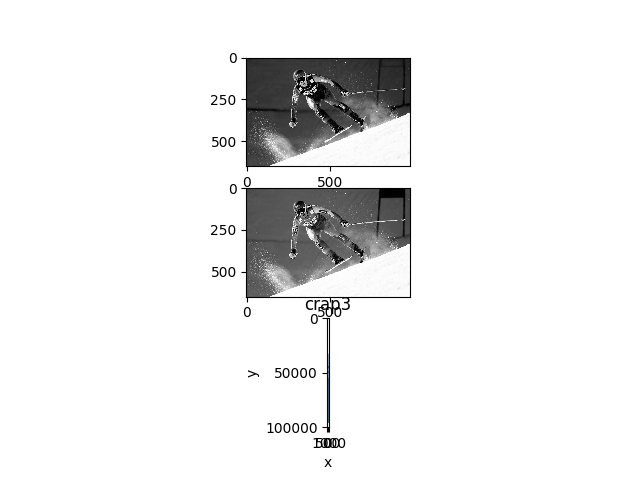

In [96]:
%matplotlib notebook
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt

pil_image = Image.open('./data/slika.jpg')
arr_image = np.array(pil_image)

#st kanalov(rgb)
print(pil_image.getbands())
#tip
print(arr_image.dtype)
#shape
print(arr_image.shape)
#prikaz
#plt.imshow(arr_image)
#matplotlib.pyplot.imshow(arr_image)
image_gray = pil_image.convert('L')
#sivinska
#matplotlib.pyplot.imshow(image_gray)

#delitev na kanale
r = arr_image[:,:,0]
g = arr_image[:,:,1]
b = arr_image[:,:,2]
#matplotlib.pyplot.imshow(g)
matplotlib.pyplot.subplot(311)
#na vajah: plt.imshow(r, cmap = 'grey')
matplotlib.pyplot.imshow(r, cmap='gray')
matplotlib.pyplot.subplot(312)
matplotlib.pyplot.imshow(g, cmap='gray')
matplotlib.pyplot.subplot(313)
matplotlib.pyplot.imshow(b, cmap='gray')



In [97]:
arr_image_blue = np.copy(arr_image)
b = arr_image_blue[:,:,2]
b_ix = np.where(b > 150) #b_indeks
b[b_ix] = 255
plt.imshow(arr_image, cmap='gray')

In [98]:
#shranjevanje
pil_b = Image.fromarray(b)
pil_b.save('modra.gif')

In [99]:
pil_slika = Image.open('./data/slika.jpg')
pil_slika_gray = pil_slika.convert('L')
pil_slika_gray.save('slika_gray.png')

2. Datoteka `slika-8bit.raw` vsebuje dvodimenzionalno (2D) sliko v obliki surovih oz. nezgoščenih podatkov (raw). Širina in višina slike sta $X \times Y = 975 \times 650$ slikovnih elementov, vsak slikovni element pa je zapisan kot nepredznačeno 8-bitno celo število. Napišite funkcijo za nalaganje poljubnih nezgoščenih slik:

    ```python
    def loadImageRaw(iPath, iSize, iFormat):
        return oImage
    ```

  kjer je `iPath` pot do slike (mapa in ime datoteke), `iSize` vektor velikosti slike v slikovnih elementih, `iFormat` pa oblika zapisa oz. tip podatka. Funkcija naj vrne naloženo sliko `oImage` v obliki `numpy` polja. Naložite knjižnico `numpy` in uporabite funkcijo `fromfile()`.

In [100]:
def loadImageRaw(iPath, iSize, iFormat):
    #glej:doc_string -> trije narekovaji
    raw_data = np.fromfile(iPath, dtype=iFormat)
    oImage = np.reshape(raw_data, iSize)
    
    return oImage
img = loadImageRaw('./data/slika-16bit.raw', (650, 975), 'uint16')
plt.imshow(img)

3. Prikažite sliko na zaslon z uporabo funkcije `imshow()`. Prikaz sivin prilagodite zapisu s pomočjo parametra `cmap` (uporabite `cm.Greys_r` v knjižnici `matplotlib.cm`). Razmerje osi prikaza prilagodite razmerju osi slike z ukazom `matplotlib.axes().set_aspect('equal', 'datalim')`. Napišite funkcijo za prikazovanje poljubnih slik v obliki `numpy` polja: 
```python
def showImage(iImage, iTitle):
``` 
kjer je `iImage` slika, ki jo želite prikazati, `iTitle` pa naslov prikaznega okna.


In [101]:
def showImage(iImage, iTitle=''):
    # dopolni
    plt.imshow(iImage, cmap='gray')
    plt.title(iTitle)
    plt.xlabel('x')
    plt.ylabel('y')

showImage(img, 'slika_vaja')

4. Napišite funkcijo za shranjevanje slik v obliki `numpy` polja: 
```python
def saveImageRaw(iImage, iPath, iFormat):
```
kjer je `iImage` slika, ki jo želite shraniti, `iPath` pot do slike (mapa in ime datoteke), `iFormat` pa oblika zapisa. Naložite knjižnico `numpy` in uporabite funkcijo `tofile()`.

In [102]:
def saveImageRaw(iImage, iPath, iFormat):
    # dopolni
    #pretvorba v format
    iImage = iImage.astype(iFormat)
    iImage.tofile(iPath)

saveImageRaw(img, 'nova_slika.raw', 'uint8')

5. Datoteka `slika-16bit.raw` vsebuje 2D sliko v nezgoščenem zapisu, slika velikosti $X \times Y = 975 \times 650$, vsak slikovni element pa je zapisan kot nepredznačeno 16-bitno celo število. Prilagodite in preizkusite delovanje zgoraj navedenih funkcij `loadImageRaw()`, `showImage()` in `saveImageRaw()`.

In [103]:
# Preizkusite delovanje funkcij loadImageRaw, showImage in saveImageRaw na sliki 'slika-16bit.raw'


6. Datoteka `slika-24bit-rgb.raw` vsebuje barvno 2D sliko v nezgoščenem zapisu, slika ima velikost $X \times Y = 975 \times 650$, posamezen slikovni element pa je predstavljen s $24 = 3 \times 8$ biti. Barvna RGB slika je zapisana kot zaporedje treh nepreznačenih 8 bitnih slik, kjer si sledijo rdeča (R), zelena (G) in modra (B) komponenta. Dopolnite funkcije `loadImageRaw()`, `showImage()` in `saveImageRaw()`, tako da bodo omogočale nalaganje, prikaz in shranjevanje barvnih RGB slik.

In [104]:
# Preizkusite delovanje funkcij loadImageRaw, showImage, saveImageRaw na sliki 'slika-24bit-rgb.raw'
#dimenzije rgb slike -> (650, 975, 3)
slk = loadImageRaw('./data/slika-24bit-rgb.raw',(650, 975, 3), 'uint8')
showImage(slk, 'slika_slk')
saveImageRaw(slk, 'slika_slk_raw', 'uint8')


In [105]:
slk_trans = np.transpose(slk, [1,0,2])
showImage(np.transpose(slk, [1,0,2]),'crap')

In [106]:
#[start:end:korak]
#[::-1]
showImage(slk[::-2,:,:],'crap1')

In [107]:
showImage(slk[100:150,300:350,:],'crap3')

In [108]:
#obrnes vrstni red barvnih kanalov showImage(img[:,:,::-1])

In [109]:
vsota_vrstice = np.sum(slk[:,:,0], axis=0)
plt.plot(vsota_vrstice)


In [1]:
import cv2
print(cv2.__version__)

4.0.1
